<a href="https://colab.research.google.com/github/ocalru/EDP-I-Simulacion-I/blob/main/Metodo_Box_Miuller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <p align="center">
    <font size="10" color="lightblue"> Método de Box-Muller. </font>
</p>



El **método de Box-Muller** tiene como objetivo transformar dos variables aleatorias independientes $ U_1 $ y $ U_2 $, distribuidas uniformemente en el intervalo $ [0, 1] $, en dos variables aleatorias normales estándar independientes $ Z_0 $ y $ Z_1 $, tales que:

$$
Z_0, Z_1 \sim N(0,1)
$$

Las densidades marginales de 2 variables aleatorias $ X $ y $ Y $ son:

- La densidad marginal de $ X $, $ f_X(x) $, se define como:

$$
f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x,y) \, dy
$$

- La densidad marginal de $ Y $, $ f_Y(y) $, se define como:

$$
f_Y(y) = \int_{-\infty}^{\infty} f_{X,Y}(x,y) \, dx
$$


Para que 2  variables aleatorias $ X $ e $ Y $ sean independientes, la densidad conjunta $ f_{X,Y}(x,y) $ debe ser el producto de las densidades marginales $ f_X(x) $ y $ f_Y(y) $:


$$
f_{X,Y}(x,y) = f_X(x) \cdot f_Y(y)
$$


La probabilidad conjunta, si las variables $ X $ y $ Y $ son independientes, es:

$$
P(X \in A, Y \in B) = \left( \int_A f_X(x) \, dx \right) \cdot \left( \int_B f_Y(y) \, dy \right)
$$

El producto de dos integrales se puede reescribir como una integral doble sobre el producto cartesiano $ A \times B $. Esto se conoce como el **Teorema de Fubini** (válido si las funciones son integrables y no negativas):

$$
\left( \int_A f_X(x) \, dx \right) \cdot \left( \int_B f_Y(y) \, dy \right) = \iint_{A \times B} f_X(x) \cdot f_Y(y) \, dx \, dy
$$

Esto es posible porque no hay ninguna dependencia entre $ x $ y $ y $. Son variables independientes, así que la integral se puede separar.


Por definición, si $ X $ y $ Y $ son independientes, entonces su densidad conjunta es:

$$
f_{X,Y}(x, y) = f_X(x) \cdot f_Y(y)
$$

Por lo tanto:

$$
\iint_{A \times B} f_X(x) \cdot f_Y(y) \, dx \, dy = \iint_{A \times B} f_{X,Y}(x, y) \, dx \, dy
$$

Y eso es justamente:

$$
P(X \in A, Y \in B)
$$

Si $ X \sim \mathcal{N}(0,1) $ y $ Y \sim \mathcal{N}(0,1) $, y son independientes entonces su densidad conjunta es:

$$
f_{X,Y}(x,y) = \frac{1}{2\pi} e^{-\frac{1}{2}(x^2 + y^2)} = \left( \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2} \right) \cdot \left( \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}y^2} \right) = f_X(x) \cdot f_Y(y)
$$

En el método de Box-Muller, generamos dos variables aleatorias $ Z_1 $ y $ Z_2 $, las cuales deseamos que sean independientes y distribuidas como normales estándar $ \mathcal{N}(0,1) $.

Entonces, la función de densidad conjunta de $ Z_1 $ y $ Z_2 $ es:

$$
f_{Z_1, Z_2}(z_1, z_2) = f_{Z_1}(z_1) \cdot f_{Z_2}(z_2)
= \left( \frac{1}{\sqrt{2\pi}} e^{-\frac{z_1^2}{2}} \right) \cdot \left( \frac{1}{\sqrt{2\pi}} e^{-\frac{z_2^2}{2}} \right)
= \frac{1}{2\pi} e^{-\frac{1}{2}(z_1^2 + z_2^2)}
$$



Para facilitar la manipulación de las variables generadas, realizamos un **cambio de coordenadas** de cartesianas a polares. En coordenadas cartesianas, las variables $ Z_0 $ y $ Z_1 $ están relacionadas con el radio $ r $ y el ángulo $ \theta $ de la siguiente manera:



$$
\begin{cases}
z_0 = r \cos(\theta) \\
z_1 = r \sin(\theta)
\end{cases}
$$

Con:

$$
r \in [0, \infty) \quad \text{(distancia desde el origen)} \\
\theta \in [0, 2\pi) \quad \text{(ángulo en el plano)}
$$


$ r $ es la magnitud del vector $ (Z_1, Z_2) $ y $ \theta $ es el ángulo que forma con el eje $ x $. Esta transformación es beneficiosa porque las fórmulas de Box-Muller tienen una interpretación geométrica en términos de un círculo.



Cuando realizamos un cambio de variables en un espacio multidimensional, es necesario ajustar la densidad de probabilidad mediante el **Jacobiano** de la transformación. El Jacobiano es una medida de cómo cambia el "volumen" o el "área" al cambiar de coordenadas. En este caso, el cambio de coordenadas de $ (Z_0, Z_1) $ a $ (r, \theta) $ tiene un Jacobiano que se calcula a partir de la siguiente matriz de derivadas parciales:

Dado:

$$
\begin{cases}
z_0 = r \cos(\theta) \\
z_1 = r \sin(\theta)
\end{cases}
$$

Calculamos el Jacobiano:

$$
J = \left| \left|
\begin{matrix}
\frac{\partial z_0}{\partial r} & \frac{\partial z_0}{\partial \theta} \\
\frac{\partial z_1}{\partial r} & \frac{\partial z_1}{\partial \theta}
\end{matrix}
\right| \right|
= \left| \left|
\begin{matrix}
\cos(\theta) & -r \sin(\theta) \\
\sin(\theta) & r \cos(\theta)
\end{matrix}
\right| \right|
$$

Determinante:

$$
\det(J) = r \left( \cos^2(\theta) + \sin^2(\theta) \right) = r
$$

Entonces, el valor absoluto del Jacobiano es:

$$
|J| = r
$$


La densidad conjunta original en $ (z_0, z_1) $ era:

$$
f_{Z_0, Z_1}(z_0, z_1) = \frac{1}{2\pi} e^{-\frac{1}{2}(z_0^2 + z_1^2)} = \frac{1}{2\pi} e^{-\frac{1}{2}r^2}
$$

Ahora multiplicamos por el Jacobiano:

$$
f_{R, \Theta}(r, \theta) = f_{Z_0, Z_1}(z_0, z_1) \cdot \left| J \right| = \frac{1}{2\pi} e^{-\frac{1}{2}r^2} \cdot r
$$

Se tiene:

$$
f(r, \theta) = \left( r e^{-r^2 / 2} \right) \cdot \left( \frac{1}{2\pi} \right)
$$

Esto se descompone en dos factores:
- El primer factor $ r e^{-r^2 / 2} $ corresponde a la **distribución Rayleigh**, que describe la magnitud del vector $ (Z_0, Z_1) $.
- El segundo factor $ \frac{1}{2\pi} $ es la densidad uniforme de $ \theta $ en el intervalo $ [0, 2\pi] $.

Esto implica que:
- $ r \sim \text{Rayleigh}(1) $, una distribución Rayleigh con parámetro $ \sigma = 1 $.
- $ \theta \sim U(0, 2\pi) $, es decir, una distribución uniforme en el intervalo $ [0, 2\pi] $.



La distribución **Rayleigh** describe la magnitud de un vector bidimensional cuyas componentes siguen distribuciones normales estándar independientes. La función de distribución acumulada (CDF) de una variable $ r \sim \text{Rayleigh}(1) $ es:

$
F_R(r) = 1 - e^{-r^2 / 2}
$

Esto se puede verificar integrando la densidad de Rayleigh desde $ 0 $ hasta $ r $:

$$
F_R(r) = \int_0^r r' e^{-r'^2 / 2} \, dr' = 1 - e^{-r^2 / 2}
$$



Para simular una variable $ R $ que sigue una distribución Rayleigh, utilizamos una variable aleatoria uniforme $ U_1 $ en el intervalo $ [0, 1] $. Sabemos que si $ R \sim \text{Rayleigh}(1) $, podemos obtener una muestra de $ R $ usando la siguiente fórmula:

$$
R = \sqrt{-2 \ln(U_1)}
$$




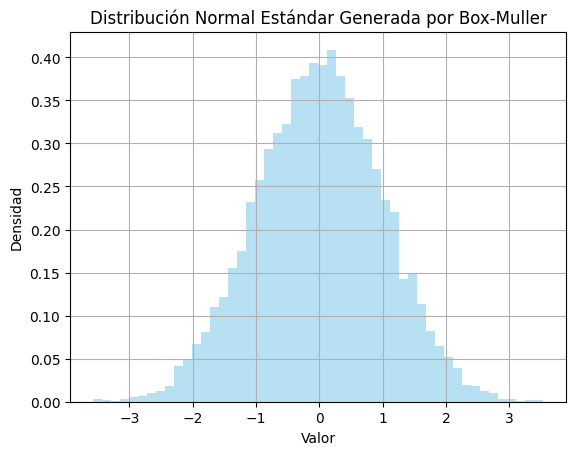

In [1]:
# Importamos los módulos necesarios
import math                  # Para funciones matemáticas como logaritmo, raíz cuadrada y funciones trigonométricas
import random                # Para generar números aleatorios uniformes
import matplotlib.pyplot as plt  # Para graficar un histograma y visualizar la distribución generada

# Definimos una función que genera números con distribución normal estándar usando el método de Box-Muller
def generar_normal_box_muller(n):
    """
    Genera 'n' números pseudoaleatorios con distribución normal estándar (media = 0, desviación estándar = 1)
    utilizando el método de Box-Muller.

    Parámetro:
        n (int): Número total de valores que se desea generar

    Retorna:
        Lista de 'n' números que siguen una distribución normal estándar
    """

    numeros_normales = []  # Inicializamos una lista vacía para almacenar los números generados

    # Cada iteración del ciclo produce 2 números normales, por eso iteramos n//2 veces
    for _ in range(n // 2):
        # Paso 1: Generar dos números aleatorios uniformes independientes entre 0 y 1
        u1 = random.random()  # u1 ≠ 0 para evitar log(0)
        u2 = random.random()  # Ambos deben ser independientes

        # Paso 2: Aplicar la transformación de Box-Muller para obtener dos números normales estándar
        # La fórmula convierte la distribución uniforme en distribución normal estándar
        z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)  # Primer número normal
        z2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)  # Segundo número normal

        # Paso 3: Añadir ambos resultados a la lista
        numeros_normales.append(z1)
        numeros_normales.append(z2)

    # Si el número solicitado es impar, generamos un número adicional
    if n % 2 == 1:
        # Generamos una pareja y solo usamos el primer número
        u1 = random.random()
        u2 = random.random()
        z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        numeros_normales.append(z1)

    # Retornar la lista completa de números generados
    return numeros_normales


# ----------------- BLOQUE PRINCIPAL -----------------

# Definimos cuántos números queremos generar
cantidad = 10000  # Puedes cambiar este número para generar más o menos valores

# Llamamos a la función para generar los datos
muestras = generar_normal_box_muller(cantidad)

# Graficamos un histograma para visualizar la distribución de los datos generados
plt.hist(muestras, bins=50, density=True, alpha=0.6, color='skyblue')  # Histograma con 50 barras, normalizado
plt.title('Distribución Normal Estándar Generada por Box-Muller')       # Título de la gráfica
plt.xlabel('Valor')                                                     # Etiqueta del eje x
plt.ylabel('Densidad')                                                  # Etiqueta del eje y
plt.grid(True)                                                          # Mostrar la cuadrícula
plt.show()                                                              # Mostrar la gráfica
